# Show density 

- author : Sylvie Dagoret-Campagne
- creation date : November 21 2020


- find density map here:

http://alasky.u-strasbg.fr/footprints/tables/vizier/I_345_gaia2

In [50]:
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
import healpy as hp 
import numpy as np

In [51]:
file1="MOC-I_345_gaia2-512.fits"
file1="densityMap-I_345_gaia2-64.hpx"
file2="densityMap-I_345_gaia2-128.hpx"

file3="densityMap-I_345_gaia2-256.hpx"
file5="densityMap-I_345_gaia2-1024.hpx"
file4="densityMap-I_345_gaia2-512.hpx"

# densityMap-I_345_gaia2-64.hpx

In [52]:
nside=512
npix=hp.nside2npix(nside)
map = hp.read_map(file4)
imap=map.astype(np.int64)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


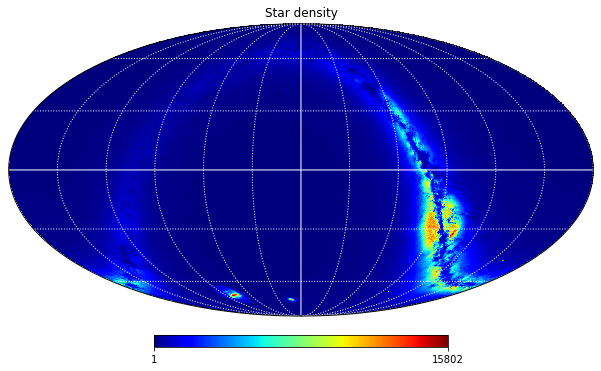

In [53]:
hp.mollview(imap,min=1,title='Star density',cmap="jet",xsize=2000)
hp.graticule(color="w")

# Generate events

In [54]:
density=imap
n_events=1000

In [55]:
dist = density**2
#dist = density   
cumm_dist = np.cumsum(dist)
cumm_dist = cumm_dist/np.max(cumm_dist)
uniform_draw = np.random.uniform(size=n_events)
indexes = np.floor(np.interp(uniform_draw, cumm_dist, np.arange(cumm_dist.size)))

In [56]:
indexes=indexes.astype(np.int64)

In [57]:
def IndexToDeclRa(index,nside):
    theta,phi=hp.pixelfunc.pix2ang(nside,index)
    return -np.degrees(theta-np.pi/2.),np.degrees(np.pi*2.-phi)

def DeclRaToIndex(decl,RA,nside):
    return hp.pixelfunc.ang2pix(nside,np.radians(-decl+90.),np.radians(360.-RA))


In [58]:
all_ra=np.zeros(n_events)
all_dec=np.zeros(n_events)
count=0
for idx in indexes:
    dec,ra=IndexToDeclRa(idx,nside)
    all_ra[count]=ra
    all_dec[count]=dec
    count+=1

In [59]:
import astropy.coordinates as coord
from astropy import units as u

the_ra = coord.Angle(all_ra*u.degree)
the_dec = coord.Angle(all_dec*u.degree)

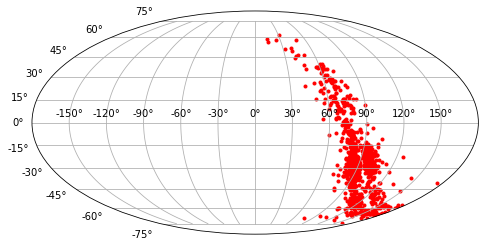

In [60]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(the_ra.radian, the_dec.radian,marker='.',color="r")
ax.grid()

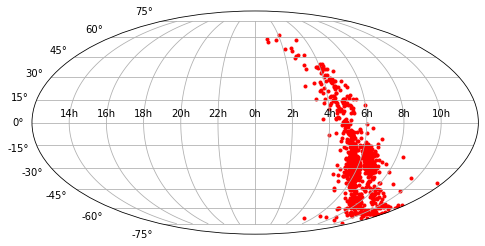

In [61]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(the_ra.radian, the_dec.radian,marker='.',color="r")
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
